<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div style="border: 2px solid black; padding: 20px; border-radius: 10px; margin-bottom: 20px; font-family: Arial, sans-serif;">
<p>Привет, Матвей.</p>
<p>Меня зовут Людмила, и я буду проводить ревью твоего проекта.</p>
<p>Предлагаю перейти на «ты», если не против)</p>
<p>Но если это неудобно — дай знать, и мы перейдем на «вы». Моя главная задача — не находить сделанные тобой ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.</p>
<p>Мои комментарии будут в ячейках «Комментарий от ревьюера».</p>

<hr style="margin: 20px 0; border-bottom: 1px solid #ccc;">

<div style="border: 1px solid #f5c6cb; background-color: #f8d7da; color: #721c24; padding: 10px; border-radius: 5px;">
        Критическое замечание, которое следует исправить.
</div>

<div style="border: 1px solid #ffeeba; background-color: #fff3cd; color: #856404; padding: 10px; border-radius: 5px; margin-top: 10px;">
        Замечание/совет на будущее.
</div>

<div style="border: 1px solid #c3e6cb; background-color: #d4edda; color: #155724; padding: 10px; border-radius: 5px; margin-top: 10px;">
        Когда всё сделано правильно.
</div>

<hr style="margin: 20px 0; border-bottom: 1px solid #ccc;">

<p>Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь их</p>

<div style="border: 1px solid #bee5eb; background-color: #d1ecf1; color: #0c5460; padding: 10px; border-radius: 5px; margin-top: 10px;">
        в такую ячейку.
</div>

<p>Давай при работе с проектом будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную проверку проекта быстрее.</p>
</div>

# Принятие решений в бизнесе.

### Цель проекта.
В рамках данного проекта неодходимо приоритизировать гипотезы для увеличения выручки и проанализировать результаты A/B-теста и, как итог, сформулировать рекомендации. 

### Описание данных:

В вашем распоряжении три датасета с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года, выгрузка их покупок за этот период и данные о рекламных расходах.

 - Набор гипотез `/datasets/hypothesis.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/hypothesis.csv);
 
    - Hypothesis — краткое описание гипотезы;   
    - Reach — охват пользователей по 10-балльной шкале;   
    - Impact — влияние на пользователей по 10-балльной шкале;   
    - Confidence — уверенность в гипотезе по 10-балльной шкале;    
    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.  


 - Информация о заказах пользователей в интернет-магазине `/datasets/orders.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders.csv)
 
     - transactionId — идентификатор заказа;    
     - visitorId — идентификатор пользователя, совершившего заказ;    
     - date — дата, когда был совершён заказ;    
     - revenue — выручка заказа;    
     - group — группа A/B-теста, в которую попал заказ. 


 - Информация о посещениях пользователями интернет-магазина `/datasets/visitors.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visitors.csv)

     - date — дата;   
     - group — группа A/B-теста;    
     - visitors — количество пользователей в указанную дату в указанной группе A/B-теста. 

     

<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера</b> 
    
Хорошо, что во вступительной части ты указываешь всю важную информацию о проекте.
</div>

## Часть 1. Предобработка данных

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from datetime import datetime, timedelta
import scipy.stats as stats

<div class="alert alert-warning">
<b>Комментарий от ревьюера:</b> Ты загружаешь scipy.stats 2 раза под разными названиями. Одного будет достаточно.

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Исправил.
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Отлично, теперь здесь у нас нет ничего лишнего. 

</div>

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#hypothesis = pd.read_csv(r'C:\Users\Matvey\Desktop\Курс\Проект_7_Принятие решений в бизнесе\hypothesis.csv')
#orders = pd.read_csv(r'C:\Users\Matvey\Desktop\Курс\Проект_7_Принятие решений в бизнесе\orders.csv')
#visitors = pd.read_csv(r'C:\Users\Matvey\Desktop\Курс\Проект_7_Принятие решений в бизнесе\visitors.csv')

In [3]:
# Увеличим максимальное количество и ширину отображающихся столбцов.
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1

# Заранее приведем названия столбцов к ниженму регистру.
hypothesis.columns = [col.lower().replace(' ','_') for col in hypothesis.columns]
orders.columns = [col.lower().replace(' ','_') for col in orders.columns]
visitors.columns = [col.lower().replace(' ','_') for col in visitors.columns]

Рассмотрим информацию об имеющихся датафреймах.

In [4]:
display(hypothesis.head(10), hypothesis.info())
display(orders.head(10), orders.info())
display(visitors.head(10), visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


None

<div class="alert alert-success">
<b> Комментарий от ревьюера</b>

Молодец, что скорректировал ширину столбцов, так намного удобнее сравнивать гипотезы. 

</div>

В данных датасетах остутствуют пропуски, однако для следующих столбцов, есть некорректные типы данных, которые нужно будет исправить. Приведём столбцы orders.date, visitors.date,  к корректному типу данных datetime. Также, необходимо будет проверить данные на наличие явных дубликатов.

In [5]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, здесь нужно поменять формат даты.
</div>

Проверим датафреймы на наличие явных дубликатов.

In [6]:
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Полезно выполнить проверку, не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Спасибо за совет, учту в будущем.
</div>

После проведения предобработки, количество строк в датафреймах не изменилось. В названиях столбцов названия столбцов к ниженму регистру, заглавные буквы заменены на строчные. Пропуски и дубликаты в датафремах отсутствуют, данные в столбцах с датами были преобразованы в формат datetime. Теперь можно приступать к приоритизации шипотез и анализу A/B теста.

## Часть 2. Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

-  Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
-  Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
-  Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Используюем следующую формулу для расчета ICE и отсортируем гипотезы по убыванию приоритета**

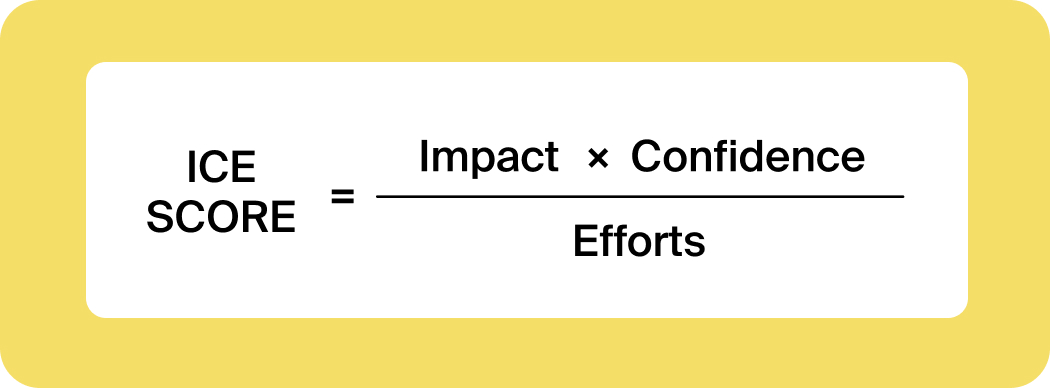

In [7]:
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
sorted_data = hypothesis.sort_values(by='ICE', ascending=False, inplace=True)
hypothesis['ICE'] = round(hypothesis['ICE'], 2)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что округляешь значения в колонке ICE.
</div>

По полученным занчениям фрейворка ICE, наиболее перспективные гипотезы: 8, 0, 7.

**Используюем следующую формулу для расчета RICE и отсортируем гипотезы по убыванию приоритета**

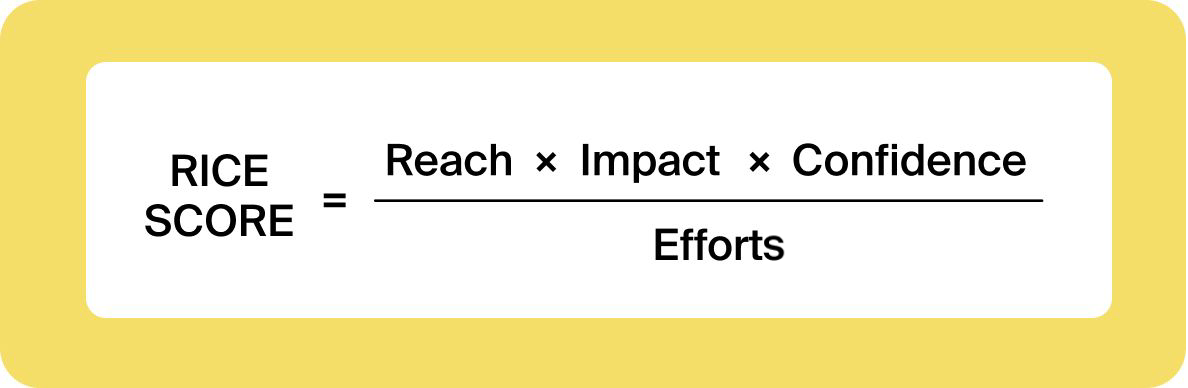

In [8]:
hypothesis['RICE'] = hypothesis.reach *hypothesis.impact * hypothesis.confidence / hypothesis.efforts
sorted_data = hypothesis.sort_values(by='RICE', ascending=False, inplace=True)
hypothesis['ICE'] = round(hypothesis['RICE'], 2)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0,3.0


По полученным занчениям фрейворка RICE, наиболее перспективные гипотезы: 7, 2, 0.

На основании полученных результатов, можем сделать вывод о том, что наиболее перспективными гипотезами являются 7, 2, 0. В данной ситуации, наиболее подходящим фреймворк для приоритизации гипотез является фреймворк RICE, так как он учитывает параметр reach (охват гипотезы) и дает более точные результаты. 

Например, лидирующая гипотеза 8 по ICE сместилась на пятое место по RICE, так как ее значение параметра reach (охват гипотезы) значительно меньше, в сравнении с гипотезами 7, 2, 0.

<div class="alert alert-block alert-warning">
    

**Комментарий от ревьюера**

Здесь можно выбрать гипотезу, которую мы будем тестировать первой, чтобы между частями проекта была логическая связь.

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Спасибо за совет, учту в будущем.
</div>

## Часть 3. Анализ A/B-теста

**1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

Чтобы построить график, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: 

In [9]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Получим агрегированные кумулятивные по дням данные о заказах и посетителях интернет-магазина

In [11]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',               
            'group': 'max',              
            'transactionid': 'nunique',  # число уникальных ID заказов
            'visitorid': 'nunique',      # число уникальных ID пользователей
            'revenue': 'sum',            
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])  # cортировка по дате и группе

# Переименуем столбцы
orders_aggregated.rename(columns={
    'transactionid': 'transaction_id',
    'visitorid': 'visitor_id'
}, inplace=True)

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [12]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия для упрощения дальнейших вычислений

In [13]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверим, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных.

In [14]:
min_date_cumulative = cumulative_data['date'].min()
max_date_cumulative = cumulative_data['date'].max()

min_date_orders = orders['date'].min()
max_date_orders = orders['date'].max()

min_date_visitors = visitors['date'].min()
max_date_visitors = visitors['date'].max()

print(f"Минимальная дата в cumulative_data: {min_date_cumulative}, Максимальная дата: {max_date_cumulative}")
print(f"Минимальная дата в orders: {min_date_orders}, Максимальная дата: {max_date_orders}")
print(f"Минимальная дата в visitors: {min_date_visitors}, Максимальная дата: {max_date_visitors}")


Минимальная дата в cumulative_data: 2019-08-01 00:00:00, Максимальная дата: 2019-08-31 00:00:00
Минимальная дата в orders: 2019-08-01 00:00:00, Максимальная дата: 2019-08-31 00:00:00
Минимальная дата в visitors: 2019-08-01 00:00:00, Максимальная дата: 2019-08-31 00:00:00


Минимальные и максимальные даты в датафрейме cumulative_data, а также в исходных данных orders и visitors совпадают, данные в cumulative_data корректно отражают диапазон дат из исходных данных.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил проверку корректности создания датафрейма cumulativeData.
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Всё верно, можно переходить к графикам.

</div>

<div class="alert alert-block alert-warning">

**Комментарий от ревьюера**

Здесь можно проверить, корректно ли был создан датафрейм cumulativeData. Например, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных.

</div>

Построим график кумулятивной выручки по дням и группам A/B-тестирования: 

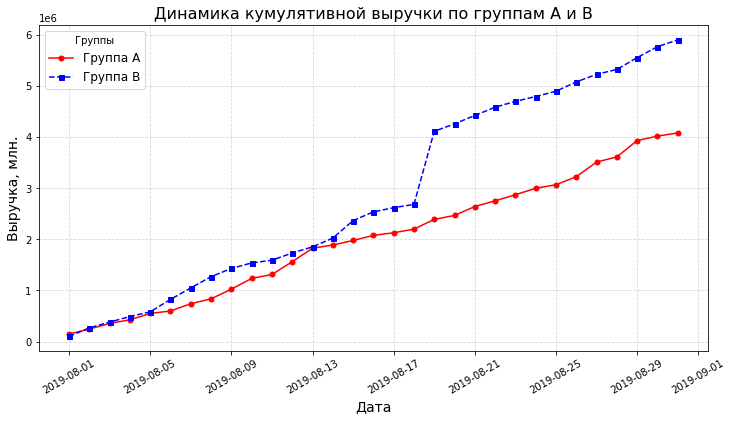

In [15]:
# Датафреймы с кумулятивной выручкой по дням для групп A и B
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], 
         label='Группа A', color='red', linestyle='-', marker='o', markersize=5)
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], 
         label='Группа B', color='blue', linestyle='--', marker='s', markersize=5)

plt.title('Динамика кумулятивной выручки по группам A и B', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка, млн.', fontsize=14)
plt.xticks(rotation=30)  # повернем метки по оси X для удобства чтения
plt.legend(title='Группы', fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()


Из полученного графика видно, что кумулятивная выручка равномерно возростает в течение всего теста. Стоит отметить, что кумулятивная выручка группы А растет практически линейно, в то время как у
групы В есть резкий скачок выручки, ориентировочно 18.08.19. Такого рода выбросы, как правило, сигнализируют о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, пока мы не знаем, с чем связан скачок в группе B: с резким увеличением количества заказов или с ростом стоимости.
</div>

**2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.** 

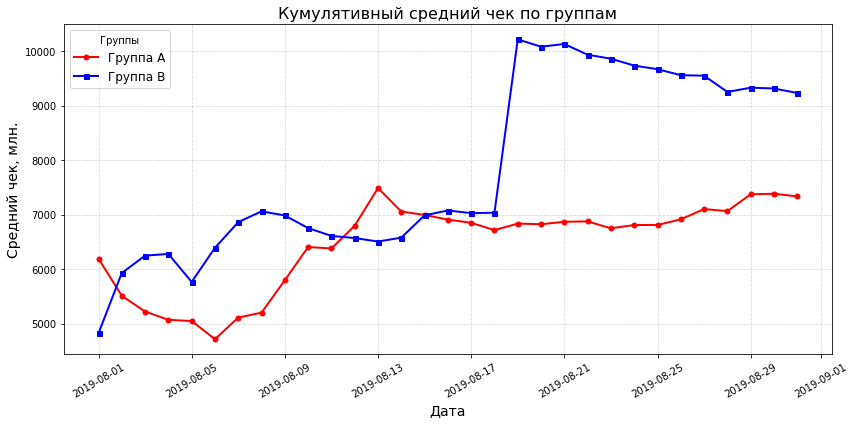

In [16]:
# Разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] /
         cumulative_revenue_A['orders'], 
         label='Группа A', color='red', linewidth=2, marker='o', markersize=5)
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] /
         cumulative_revenue_B['orders'], 
         label='Группа B', color='blue', linewidth=2, marker='s', markersize=5)

plt.title('Кумулятивный средний чек по группам', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Средний чек, млн.', fontsize=14)
plt.xticks(rotation=30)  # повернем метки по оси X для удобства чтения
plt.legend(title='Группы', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()
plt.show()

Из полученного графика видно, что кумулятивный средний чек у группы А установился после 13.08.19. У груупы B 18.09.19 мы видим резкий скачек значений среднего чека, что может говорить о том, что в тест попало некоторое количество аномально дорогих заказов.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Да, крупные заказы могли стать причиной резкого роста.
</div>

**3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

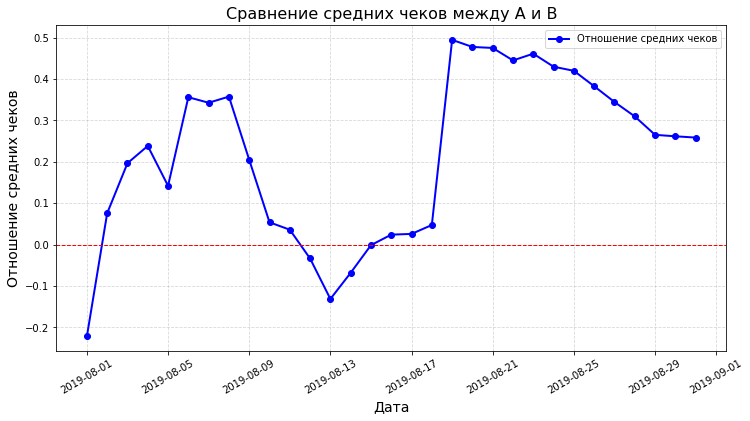

In [17]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date',
                                                       right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 6))  # Увеличиваем размер графика
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1, 
         color='blue', linewidth=2, marker='o', label='Отношение средних чеков')  

# добавим горизонтальную ось методом axhline()
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Сравнение средних чеков между A и B', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Отношение средних чеков', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(rotation=30)
plt.show()


Из полученного графика видно, что график различия между сегментами резко «скачет». Это однозначно говорит о том, что наличии выбросов в значениях. Их необходимо будет определить в дальнейшем.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Действительно, этот график не стабилизировался.
</div>

**4) Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**
    
Импорт из ячейки ниже уже есть в начале проекта.
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Удалил из ячейки ниже ненужный импорт.
</div>

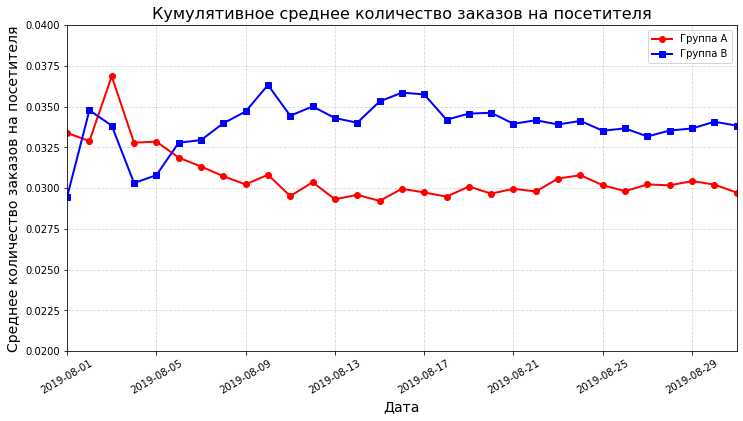

In [18]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# отделим данные, в зависимости от группы по группе 
cumulativeDataA = cumulative_data[cumulative_data['group'] == 'A']
cumulativeDataB = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(12, 6))  
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A',
         color='red', linewidth=2, marker='o')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B',
         color='blue', linewidth=2, marker='s')
plt.xticks(rotation=30)
plt.title('Кумулятивное среднее количество заказов на посетителя', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=14)

# зададим масштаб осей методом plt.axis(), использую min и max значения.
# для автоматического определения диапазона дат, который будет отображаться на графике.
plt.axis(xmin=cumulativeDataA['date'].min(), xmax=cumulativeDataA['date'].max(), ymin=0.020, ymax=0.04)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


Из полученного графика видно, что с начала месяца значения обеих групп значительно колебались. Так, до 06.08.19 среднее количество заказов на посетителя группы А выше чем группы В. После этой даты, наблюдается резкий рост среднего количество заказов на посетителя группы B, т.е, как мы уже видели по другим графикам, значение среднего чека значительно возростает. 

Также, стоит отметить, что среднее количество заказов на посетителя обеих групп начало стабилизироваться к 18.08.19.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Заменил формулировки на правильные, в пкнктах 4, 5, 10, 12. Надеюсь теперь все в порядке.
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Да, теперь формулировки совпадают.

</div>

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь и дальше (в следующем пункте, а также в пунктах 10 и 12) ты называешь один и тот же показатель иногда "конверсией", а иногда "средним количеством заказов на посетителя". Вторая формулировка более корректная, так как для расчета конверсии в чистом виде, нам нужны id посетителей. Поправь, пожалуйста, формулировки, это можно сделать с помощью автозамены: в меню Edit ➡ Find and Replace. 
    
Кнопка со скриншота ниже позволяет сделать замены сразу во всех ячейках:
    
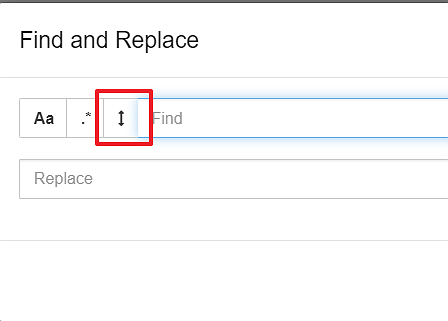
</div>

**5) Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

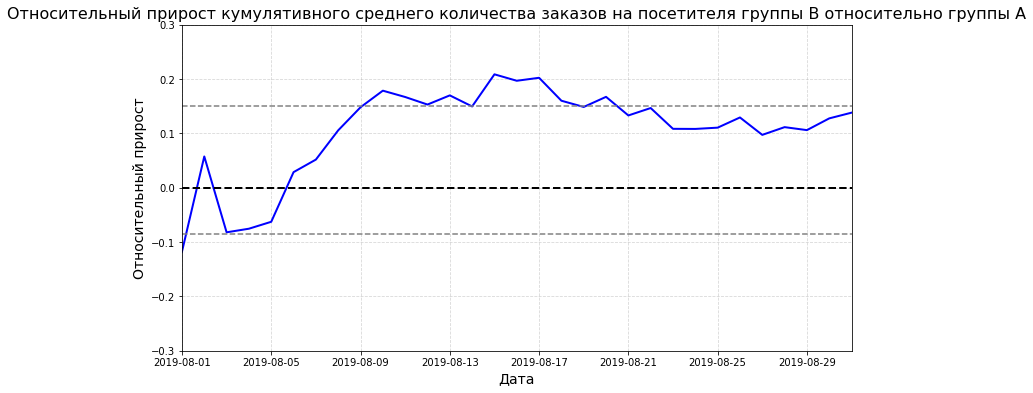

In [19]:
# объединяем данные 
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

# строим график относительного прироста
plt.figure(figsize=(12, 6))  
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1, 
    label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A", 
    color='blue', 
    linewidth=2)

# добавим горизонтальные оси методом axhline()
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.axhline(y=-0.085, color='gray', linestyle='--', linewidth=1.5)
plt.axhline(y=0.15, color='gray', linestyle='--', linewidth=1.5)

plt.axis(
    xmin=mergedCumulativeConversions['date'].min(), 
    xmax=mergedCumulativeConversions['date'].max(), ymin=-0.30, ymax=0.3)

plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Относительный прирост', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Хорошо, что ты добавляешь дополнительную линию там, где происходит стабилизация графика.
</div>

Из полученного графика видно, что в начале теста группа B проигрывала группе A, наблюдался резкий скачек 02.08.19 и сразу же резкий спад. Однако, после 03.08.19, наблюдается стабильный рост, с небольшими колебаниями значений  среднего количества заказов. Определенно, такие результаты подтверждают предыдущие выводы о наличии аномально крупных заказов. Необходимо проанализировать аномалии для более четких выводов.

**6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


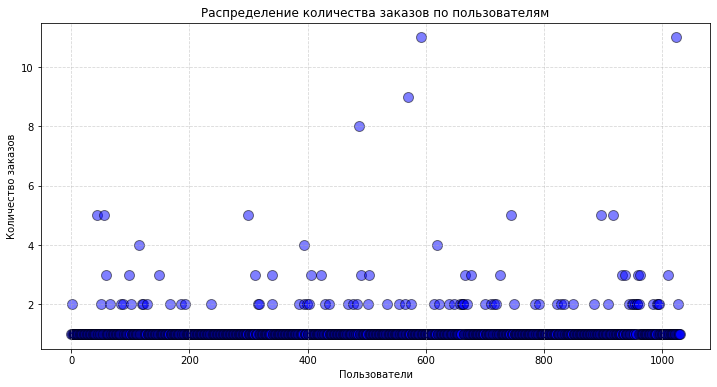

In [20]:
# выделим число заказов по пользователям
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
orders_by_users.columns =  ['visitorid', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10))
#display(orders_by_users.describe())

# зададим значения по горизонтальной оси
x_values = pd.Series(range(0,len(orders_by_users))) # серия из чисел от 0 до количества наблюдений 

# построим диаграмму методом scatter(). 
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_by_users['orders'], color='blue', edgecolors='black', s=100, alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()

Из полученного графика видно, что большинство пользователей совершают заказ только один раз, присутствуют так же пользователи, совершающие от 2 до 11 заказов. Определим границу для определения аномальных пользователей ниже.


**7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [21]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Исходя из полученных рузльтатов, можем сделать вывод о том, что доля пользователей совершивших более 2  заказов составляет 5%, и 1% у пользьзователей, совершивших более 4 заказов. Таким образом, аномальными пользователей в данном случае будет те пользователи, которые совершили более 4 заказов.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Такое определение выбросов для количества заказов корректно.
</div>

**8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

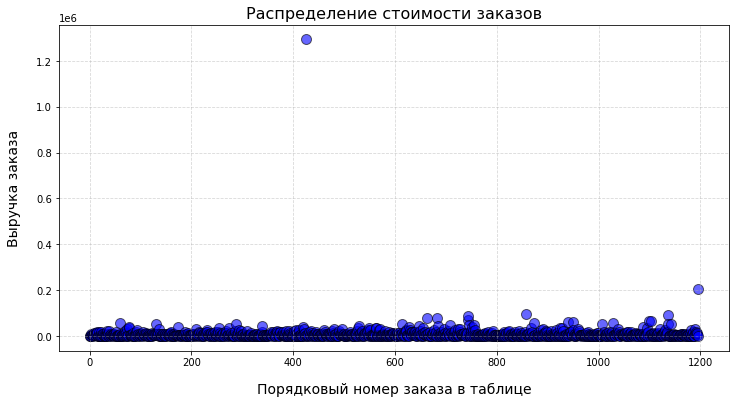

In [22]:
plt.figure(figsize=(12, 6))

plt.scatter(pd.Series(range(0, len(orders['revenue']))), orders['revenue'], 
            color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Распределение стоимости заказов', fontsize=16)
plt.ylabel('Выручка заказа', fontsize=14, labelpad=15)
plt.xlabel('Порядковый номер заказа в таблице', fontsize=14, labelpad=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Из полученного графика видно, основная масса значений выручки располагаются на уровне до 25000 Также, в данных присутствуют выбросы, например заказ на 1.2 млн. Однако в таком виде довольно проблематично отследить их все,  поэтому построим аналологичный график, ограничив выручку с заказа не выше 100000.

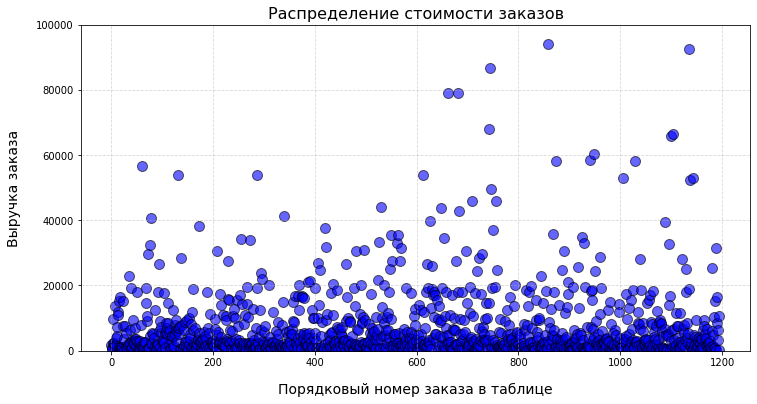

In [23]:
plt.figure(figsize=(12, 6))

plt.scatter(pd.Series(range(0, len(orders['revenue']))), orders['revenue'], 
            color='blue', alpha=0.6, edgecolors='black', s=100)

plt.title('Распределение стоимости заказов', fontsize=16)
# Ограничение выручки для заказов
plt.ylim(0,100000)
plt.ylabel('Выручка заказа', fontsize=14, labelpad=15)
plt.xlabel('Порядковый номер заказа в таблице', fontsize=14, labelpad=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Хорошо, что ты добавляешь еще один график, чтобы мы могли рассмотреть основную часть заказов.

</div>

Из полученного графика видно, что основная масса заказов располагаются на уровне 20000 присутствуют так же пользователи, совершающие заказы от 20000 и выше, но их количество незначительно. Определим границу для определения аномальной стоимости заказов ниже.

**9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [24]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Исходя из полученных результатов, мы видим, что основная масса заказов находится на уровне до 18000 Заказы со стоимостью 28000 составляют 5%, а заказы выше 58233 составляют 1%. Таким образом, аномальными суммами заказов, в данном случае, будет суммы выше 58233.

<div class="alert alert-block alert-success"> <b>Комментарий от ревьюера</b> 
    
Молодец, что разобрался с аномалиями в данных и корректно освоил расчет кумулятивных метрик.
</div>

**10) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

В данном случае для того, что бы проверить есть ли статическая значимость  различий в среднем количестве заказов на посетителя между группами по «сырым» данным, применим тест Манна-Уитни. 

Сформулируем, и выдвинем следующие гипотезы:
- **H0:** Статистически значимых различий в среднем количестве заказов между группами нет. 
- **H1:** Статистически значимые различия в среднем количестве заказов между группами есть.

Уровень статистической значимости alpha = 0.05.

Перед тем как считать статистическую значимость различия в среднем количестве заказов между группами, необходимо подготовить данные.

In [25]:
# Формируем ежедневные данные для группы A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Кумулятивные данные для группы A
visitorsACummulative = visitorsADaily.groupby('date').sum().cumsum().reset_index()
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

ordersACummulative = ordersADaily.groupby('date').sum().cumsum().reset_index()
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# Формируем ежедневные данные для группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Кумулятивные данные для группы B
visitorsBCummulative = visitorsBDaily.groupby('date').sum().cumsum().reset_index()
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersBCummulative = ordersBDaily.groupby('date').sum().cumsum().reset_index()
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# Объединяем полученные таблицы в одну по дате
data = (ordersADaily
        .merge(ordersBDaily, on='date', how='left')
        .merge(ordersACummulative, on='date', how='left')
        .merge(ordersBCummulative, on='date', how='left')
        .merge(visitorsADaily, on='date', how='left')
        .merge(visitorsBDaily, on='date', how='left')
        .merge(visitorsACummulative, on='date', how='left')
        .merge(visitorsBCummulative, on='date', how='left'))

# Вывод первых 10 строк
data.head(10)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Этот код можно сократить: нам не нужно собирать кумулятивные данные для проверки гипотез, потому что это уже сделано выше.

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Ок, учту на будующее. Просто тут было удобно взять за основу шаблон из тренажера. Чтобы работаль с удобными переменными.
</div>

Теперь все готово для расчета статистической значимости различия в среднем количестве заказов между группами. 

In [26]:
# Создадим переменные orders_by_users_a и orders_by_users_b .
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

orders_by_users_a = (orders[orders['group'] == 'A'].groupby('visitorid', as_index=False)
                     .agg({'transactionid': pd.Series.nunique}))
orders_by_users_a.columns = ['visitorid', 'orders']

orders_by_users_b = (orders[orders['group'] == 'B'].groupby('visitorid', as_index=False)
                     .agg({'transactionid': pd.Series.nunique}))
orders_by_users_b.columns = ['visitorid', 'orders']

# Создадим по выборке для А и В,
# где каждый элемент — число заказов определённого пользователя, в том числе ноль.

sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                          len(orders_by_users_a['orders'])),name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                          len(orders_by_users_b['orders'])), name='orders')],axis=0)


Посчитаем критерий Манна-Уитни и относительный прирост среднего количества заказов на посетителя. Выведыем p-value для сравнения среднего между группами. 

In [27]:
# Расчитаем критерий Манна-Уитни и относительный прирост среднего количества заказов на посетителя.

alpha = 0.05
print('Значение p-value для конверсий: {:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

if stats.mannwhitneyu(sample_a, sample_b)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")
    
print('Относительный прирост группы B: {:.2%}'.format((sample_b.mean()/sample_a.mean()) - 1))

Значение p-value для конверсий: 0.017
Отвергаем нулевую гипотезу
Относительный прирост группы B: 13.81%


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Хорошо, что ты подписываешь выводимые числа. Так их нельзя перепутать.
</div>

Исходя из полученных результатов, можем отвергунть гипотезу H0 ("Статистически значимых различий в конверсии между группами нет."), так так p-value = 0.017 << 0.05. Следовательно, можно утверждать, что  что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.81%.

**11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

В данном случае для того, что бы проверить есть ли статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным, применим тест Манна-Уитни.

Сформулируем, и выдвинем следующие гипотезы:
- **H0:** Статистически значимых различий в среднем чеке между группами нет. 
- **H1:** Статистически значимые различия в среднем чеке между группами есть.

Уровень статистической значимости alpha = 0.05.

In [28]:
print('Значение p-value для среднего чека: {:.3f}'.format(stats.mannwhitneyu(
    orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]))

if stats.mannwhitneyu(orders.query('group == "A"')['revenue'],
                   orders.query('group == "B"')['revenue'])[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")
print('Относительный прирост среднего чека группы B: {:.2%}'.format(
    (orders.query('group == "B"')['revenue'].mean() / 
     orders.query('group == "A"')['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.729
Не удалось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: 25.87%


Исходя из полученных результатов, не удалось отвергнуть нулевую гипотезу H0 ("Статистически значимых различий в среднем чеке между группами нет."), так так p-value = 0.729 > 0.05. Относительный прирост среднего чека группы B к среднему чеку группы A равен 25.87%, что значительно и в очередной раз указывает на наличие аномальных заказов.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь надо поправить гипотезу в выводе, так как речь идет о среднем чеке.
  
</div>

<div class="alert alert-block alert-info">
    
**Комментарий от ревьюера**
    
Поправил гипотезу в выводе.
  
</div>

**12) Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Напомним, что принимаем за аномальных пользователей тех, кто оформил больше 4 заказов (99-й перцентиль) или оформил заказ дороже 58233 (99-й перцентиль). Таким образом, мы избавимся от 1% пользователей с аномально высоким числом заказов и от 1% пользователей с аномально дорогими заказами.

Сформулируем, и выдвинем следующие гипотезы:
- **H0:** Статистически значимых различий в среднем количестве заказов между группами нет. 
- **H1:** Статистически значимые различия в среднем количестве заказов между группами есть.

Уровень статистической значимости alpha = 0.05.

Перед расчетом статистическую значимость различий в среднем количестве заказов на посетителя между группами, подготовим «очищенные» данные.

In [29]:
# Вычисляем 99-й перцентиль для количества заказов и дохода
percentile_99_orders = np.percentile(orders_by_users['orders'], 99)
percentile_99_revenue = np.percentile(orders['revenue'], 99)

print("99-й перцентиль для количества заказов:", percentile_99_orders)
print("99-й перцентиль для дохода:", percentile_99_revenue)
print()

# Подсчет количества заказов для пользователей в группе A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

# Подсчет количества заказов для пользователей в группе B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

# Делаем срез пользователей с условием число заказов > 99-й перцентиль
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_99_orders]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_99_orders]['visitorid'],
    ],
    axis=0,
)

# Делаем срез пользователей с условием заказы дороже 99-го перцентиля
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_99_revenue]['visitorid']

# Объединяем аномальных пользователей
abnormal_users = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Выводим множество аномальных пользователей. 
print("Аномальные пользователи:\n", abnormal_users)


99-й перцентиль для количества заказов: 4.0
99-й перцентиль для дохода: 58233.19999999999

Аномальные пользователи:
 1099    148427295 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
326     2378935119
278     2458001652
940     4003628586
743     4133034833
499     4256040402
662     4266935830
Name: visitorid, dtype: int64


<div class="alert alert-block alert-info">
    
**Комментарий от ревьюера**
    
Заменил ручной ввод на результат расчета выбранного перцентиля. Также теперь вместо 0.05 использую переменную alpha.
  
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Лучше избегать ручного ввода значений при фильтрации: можно использовать непосредственно результат расчета выбранного перцентиля. 
    
Для этого вписанные вручную числа надо заменить на такие же расчеты, как ты использовал для границы определения аномальных заказов, только там ты указываешь список перцентилей, а здесь нам нужен один.

</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Так не придется менять вписанные вручную числа, если поменяются данные.
</div>

Теперь все готово для расчета статистической значимости различий в конверсии между группами теста по очищенным данным. 

In [30]:
# создадим таблицы с количеством заказов по пользователям для каждой группы без аномальных значений.
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [31]:
p_value = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print("P-value: {0:.3f}".format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")
    
print("Относительный прирост конверсии группы B: {0:.2%}".format(sample_b_filtered.mean() / sample_a_filtered.mean()-1))

P-value: 0.014
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 15.33%


Исходя из полученных результатов, можем отвергунть гипотезу H0 ("Статистически значимых различий в конверсии между группами нет."). P-value: 0.014 < 0.05. На очищенных данных разница в среднем количестве заказов на посетителя между группами присутствует, а относительный прирост среднего количества заказов на посетителя группы В отнистельно группы А составляет 15.33%, что значительно.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, при анализе "очищенных данных" p-value стало еще меньше и все так же меньше 0.05, следовательно, между группами есть статистически значимые различия.
</div>

**13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Сформулируем, и выдвинем следующие гипотезы:
- **H0:** Статистически значимых различий в среднем чеке между группами нет. 
- **H1:** Статистически значимые различия в среднем чеке между группами есть.

Уровень статистической значимости alpha = 0.05.

In [32]:
# посчитаем критерий Манна-Уитни к среднему чеку для очищенных данных 
# и относительный прирост среднего чека группы В

filtered_pvalue_mean_check = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == "A", np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == "B", np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(filtered_pvalue_mean_check))

if filtered_pvalue_mean_check < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")
    
print('Относительный прирост среднего чека группы B: {:.3%}'.format(
    (orders[np.logical_and(orders['group']=='B', 
            np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()/
     orders[np.logical_and(orders['group']=='A', 
            np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.851
Не удалось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: -0.575%


Исходя из полученных результатов, не удалось отвергнуть нулевую гипотезу H0 ("Статистически значимых различий в среднем чеке между группами нет."), так так p-value = 0.851> 0.05. Относительный прирост среднего чека группы B к среднему чеку группы A изменился, и стал равен -0.575%, теперь различия между средними чеками практически отсутствуют.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь также надо поправить вывод.
  
</div>

<div class="alert alert-block alert-info">
    
**Комментарий от ревьюера**
    
Поправил гипотезу в выводе.
  
</div>

# 14) Выводы
**На основании проведенного анализа были выявлены следующие закономерности и сформулированы рекомендации, позволяющие спланировать успешные рекламные кампании по увеличению выручки.**

**1) Приоритизация гипотез.**

В данной ситуации, наиболее подходящим фреймворк для приоритизации гипотез является фреймворк RICE, так как он учитывает параметр reach (охват гипотезы) и дает более точные результаты.

По результатам, наиболее перспективными гипотезами являются:

- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**2) Анализ A/B-теста.**

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.


- График различия среднего чека колеблется, по нему в первый раз были найдены аномалии.


- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Относительный прирост конверсии группы В относительно группы А составляет 15.33%, что значительно выше.


- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Относительный прирост среднего чека группы B к среднему чеку группы A изменился, и стал равен -0.575%

**Исходя из фактов выше, принимаем решение остановить тест, зафиксировав победу группы В.**

<div class="alert alert-block alert-info">

<b>Итоговый комментарий от ревьюера</b>

Благодарю тебя за выполнение проекта. Вижу ты постарался, когда работал над ним. Однако, в проекте есть несколько замечаний, которые надо исправить:

* скорректировать формулировки;
* дополнить описание статистических расчетов;
* не использовать ручной ввод при фильтрации.
       
Жду проект после доработки. Уверена, ты справишься. 💪
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Спасибо, что учел мои комментарии. Ты приложил много усилий, чтобы довести проект до конца, надеюсь, что эта работа помогла тебе лучше понять теорию. Я принимаю проект и желаю удачи в прохождении курса!

</div>